In [15]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
# Common imports
import numpy as np
import os
# to make this notebook's output stable across runs
np.random.seed(42)
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn import datasets

In [16]:
# just from the book's notebook

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
np.mean(y_train==1), np.mean(y_test==1)

(0.325, 0.36666666666666664)

In [19]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
linear_svm_clf =  LinearSVC(max_iter=5000)

par_grid_search=[{'loss':['hinge', 'squared_hinge'],  
                  'C':[0.05,0.1,0.5,1,5]}]

#defining the search function
grid_search=GridSearchCV(linear_svm_clf,par_grid_search,cv=5,scoring='accuracy',verbose=3)

#perforing the search
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ................C=0.05, loss=hinge;, score=0.917 total time=   0.0s
[CV 2/5] END ................C=0.05, loss=hinge;, score=1.000 total time=   0.0s
[CV 3/5] END ................C=0.05, loss=hinge;, score=0.833 total time=   0.0s
[CV 4/5] END ................C=0.05, loss=hinge;, score=0.958 total time=   0.0s
[CV 5/5] END ................C=0.05, loss=hinge;, score=0.958 total time=   0.0s
[CV 1/5] END ........C=0.05, loss=squared_hinge;, score=1.000 total time=   0.0s
[CV 2/5] END ........C=0.05, loss=squared_hinge;, score=1.000 total time=   0.0s
[CV 3/5] END ........C=0.05, loss=squared_hinge;, score=0.833 total time=   0.0s
[CV 4/5] END ........C=0.05, loss=squared_hinge;, score=1.000 total time=   0.0s
[CV 5/5] END ........C=0.05, loss=squared_hinge;, score=1.000 total time=   0.0s
[CV 1/5] END .................C=0.1, loss=hinge;, score=1.000 total time=   0.0s
[CV 2/5] END .................C=0.1, loss=hinge;

GridSearchCV(cv=5, estimator=LinearSVC(max_iter=5000),
             param_grid=[{'C': [0.05, 0.1, 0.5, 1, 5],
                          'loss': ['hinge', 'squared_hinge']}],
             scoring='accuracy', verbose=3)

In [41]:
# Let's look at all the performances
cv_res=grid_search.cv_results_
for acc,params in zip(cv_res["mean_test_score"],cv_res["params"]):
    print(acc,params)

0.9333333333333333 {'C': 0.05, 'loss': 'hinge'}
0.9666666666666668 {'C': 0.05, 'loss': 'squared_hinge'}
0.9666666666666666 {'C': 0.1, 'loss': 'hinge'}
0.9416666666666667 {'C': 0.1, 'loss': 'squared_hinge'}
0.9416666666666667 {'C': 0.5, 'loss': 'hinge'}
0.9416666666666667 {'C': 0.5, 'loss': 'squared_hinge'}
0.9416666666666667 {'C': 1, 'loss': 'hinge'}
0.9416666666666667 {'C': 1, 'loss': 'squared_hinge'}
0.9416666666666667 {'C': 5, 'loss': 'hinge'}
0.9416666666666667 {'C': 5, 'loss': 'squared_hinge'}


In [42]:
grid_search.best_params_

{'C': 0.05, 'loss': 'squared_hinge'}

In [43]:
final_lin_svm = grid_search.best_estimator_

lin_svm_predict = final_lin_svm.predict(X_test)

np.mean((lin_svm_predict==y_test))

1.0

OK, This works very well. Depending on the test size the best model cahnges, but still it gives accuracy 1 on the test set. 

In [44]:
w_lin_svm = final_lin_svm.coef_[0]
b_lin_svm = final_lin_svm.intercept_[0]

x0_min_plt = min(np.concatenate((X_train[:,0], X_test[:,0]), axis=0))
x0_max_plt = max(np.concatenate((X_train[:,0], X_test[:,0]), axis=0))
x0_linspace = np.linspace(x0_min_plt,x0_max_plt,10**3)

# w0 * x0 + w1 * x1 + b =0 =>  x1 = - w0 * x0 / w1 - b/w1 

dec_boundary = [-(w_lin_svm[0] * x + b_lin_svm)/w_lin_svm[1] for x in x0_linspace]

modified_x0_linspace= np.linspace(-0.5, 1.6 ,10**2)
modified_dec_boundary = [-(w_lin_svm[0] * x + b_lin_svm)/w_lin_svm[1] for x in modified_x0_linspace]

# SGDClassifier 

In [116]:
sgd_clf=SGDClassifier(max_iter=5000, tol=1e-4,penalty='elasticnet')

In [117]:
sgd_parm_grid_search=[{'alpha':[1e-6,1e-4,1e-3,1e-2,1],'l1_ratio':[0,0.2,0.4,0.6,0.8,1]}]

sgd_grid_search=GridSearchCV(sgd_clf,sgd_parm_grid_search,cv=5,scoring='accuracy',verbose=2)

sgd_grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] alpha=1e-06, l1_ratio=0 .........................................
[CV] .......................... alpha=1e-06, l1_ratio=0, total=   0.0s
[CV] alpha=1e-06, l1_ratio=0 .........................................
[CV] .......................... alpha=1e-06, l1_ratio=0, total=   0.0s
[CV] alpha=1e-06, l1_ratio=0 .........................................
[CV] .......................... alpha=1e-06, l1_ratio=0, total=   0.0s
[CV] alpha=1e-06, l1_ratio=0 .........................................
[CV] .......................... alpha=1e-06, l1_ratio=0, total=   0.0s
[CV] alpha=1e-06, l1_ratio=0 .........................................
[CV] .......................... alpha=1e-06, l1_ratio=0, total=   0.0s
[CV] alpha=1e-06, l1_ratio=0.2 .......................................
[CV] ........................ alpha=1e-06, l1_ratio=0.2, total=   0.0s
[CV] alpha=1e-06, l1_ratio=0.2 .......................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.2s finished


GridSearchCV(cv=5,
             estimator=SGDClassifier(max_iter=5000, penalty='elasticnet',
                                     tol=0.0001),
             param_grid=[{'alpha': [1e-06, 0.0001, 0.001, 0.01, 1],
                          'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1]}],
             scoring='accuracy', verbose=2)

In [118]:
cv_res=sgd_grid_search.cv_results_
for acc,params in zip(cv_res["mean_test_score"],cv_res["params"]):
    print(acc,params)

0.9583333333333334 {'alpha': 1e-06, 'l1_ratio': 0}
0.9583333333333334 {'alpha': 1e-06, 'l1_ratio': 0.2}
0.925 {'alpha': 1e-06, 'l1_ratio': 0.4}
0.925 {'alpha': 1e-06, 'l1_ratio': 0.6}
0.9083333333333334 {'alpha': 1e-06, 'l1_ratio': 0.8}
0.9333333333333333 {'alpha': 1e-06, 'l1_ratio': 1}
0.9583333333333334 {'alpha': 0.0001, 'l1_ratio': 0}
0.9583333333333334 {'alpha': 0.0001, 'l1_ratio': 0.2}
0.9333333333333333 {'alpha': 0.0001, 'l1_ratio': 0.4}
0.9166666666666666 {'alpha': 0.0001, 'l1_ratio': 0.6}
0.9333333333333333 {'alpha': 0.0001, 'l1_ratio': 0.8}
0.95 {'alpha': 0.0001, 'l1_ratio': 1}
0.9416666666666667 {'alpha': 0.001, 'l1_ratio': 0}
0.925 {'alpha': 0.001, 'l1_ratio': 0.2}
0.95 {'alpha': 0.001, 'l1_ratio': 0.4}
0.9583333333333334 {'alpha': 0.001, 'l1_ratio': 0.6}
0.95 {'alpha': 0.001, 'l1_ratio': 0.8}
0.95 {'alpha': 0.001, 'l1_ratio': 1}
0.9416666666666667 {'alpha': 0.01, 'l1_ratio': 0}
0.95 {'alpha': 0.01, 'l1_ratio': 0.2}
0.9416666666666667 {'alpha': 0.01, 'l1_ratio': 0.4}
0.94166

In [119]:
sgd_grid_search.best_params_

{'alpha': 1e-06, 'l1_ratio': 0}

In [120]:
final_sgd_clf=sgd_grid_search.best_estimator_

In [121]:
sgd_predict=final_sgd_clf.predict(X_test)
np.mean(sgd_predict==y_test)

1.0

In [122]:
w_sgd = final_sgd_clf.coef_[0]
b_sgd = final_sgd_clf.intercept_[0]


sgd_dec_boundary = [-(w_sgd[0] * x + b_sgd)/w_sgd[1] for x in modified_x0_linspace]

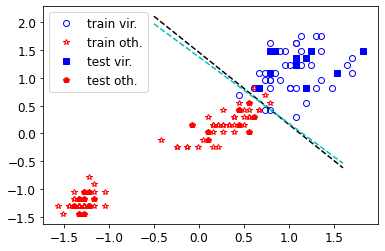

In [125]:
plt.plot(X_train[:,0][y_train==1],X_train[:,1][y_train==1],"bo",fillstyle="none",label="train vir.")
plt.plot(X_train[:,0][y_train==0],X_train[:,1][y_train==0],"r*",fillstyle="none",label="train oth.")

plt.plot(X_test[:,0][y_test==1],X_test[:,1][y_test==1],"bs",label="test vir.")
plt.plot(X_test[:,0][y_test==0],X_test[:,1][y_test==0],"rp",label="test oth.")

plt.plot(modified_x0_linspace,modified_dec_boundary,"k--")
plt.plot(modified_x0_linspace,sgd_dec_boundary,"c--")

plt.legend(loc="best", fontsize=12)
plt.show()